In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('/content/Program_2_Dataset.csv')

In [3]:
 data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [5]:
data.sample

<bound method NDFrame.sample of      Crime_Rate  Zone_proportion  Non_Retail_Acres  CHAS    NOX  Avg_rooms   \
0       0.06860              0.0              2.89     0  0.445       7.416   
1       0.14866              0.0              8.56     0  0.520       6.727   
2       0.11432              0.0              8.56     0  0.520       6.781   
3       0.22876              0.0              8.56     0  0.520       6.405   
4       0.21161              0.0              8.56     0  0.520       6.137   
..          ...              ...               ...   ...    ...         ...   
501    12.80230              0.0             18.10     0  0.740       5.854   
502    10.67180              0.0             18.10     0  0.740       6.459   
503     6.28807              0.0             18.10     0  0.740       6.341   
504     9.92485              0.0             18.10     0  0.740       6.251   
505     9.32909              0.0             18.10     0  0.713       6.185   

      AGE  Distance

In [6]:
data.shape

(506, 14)

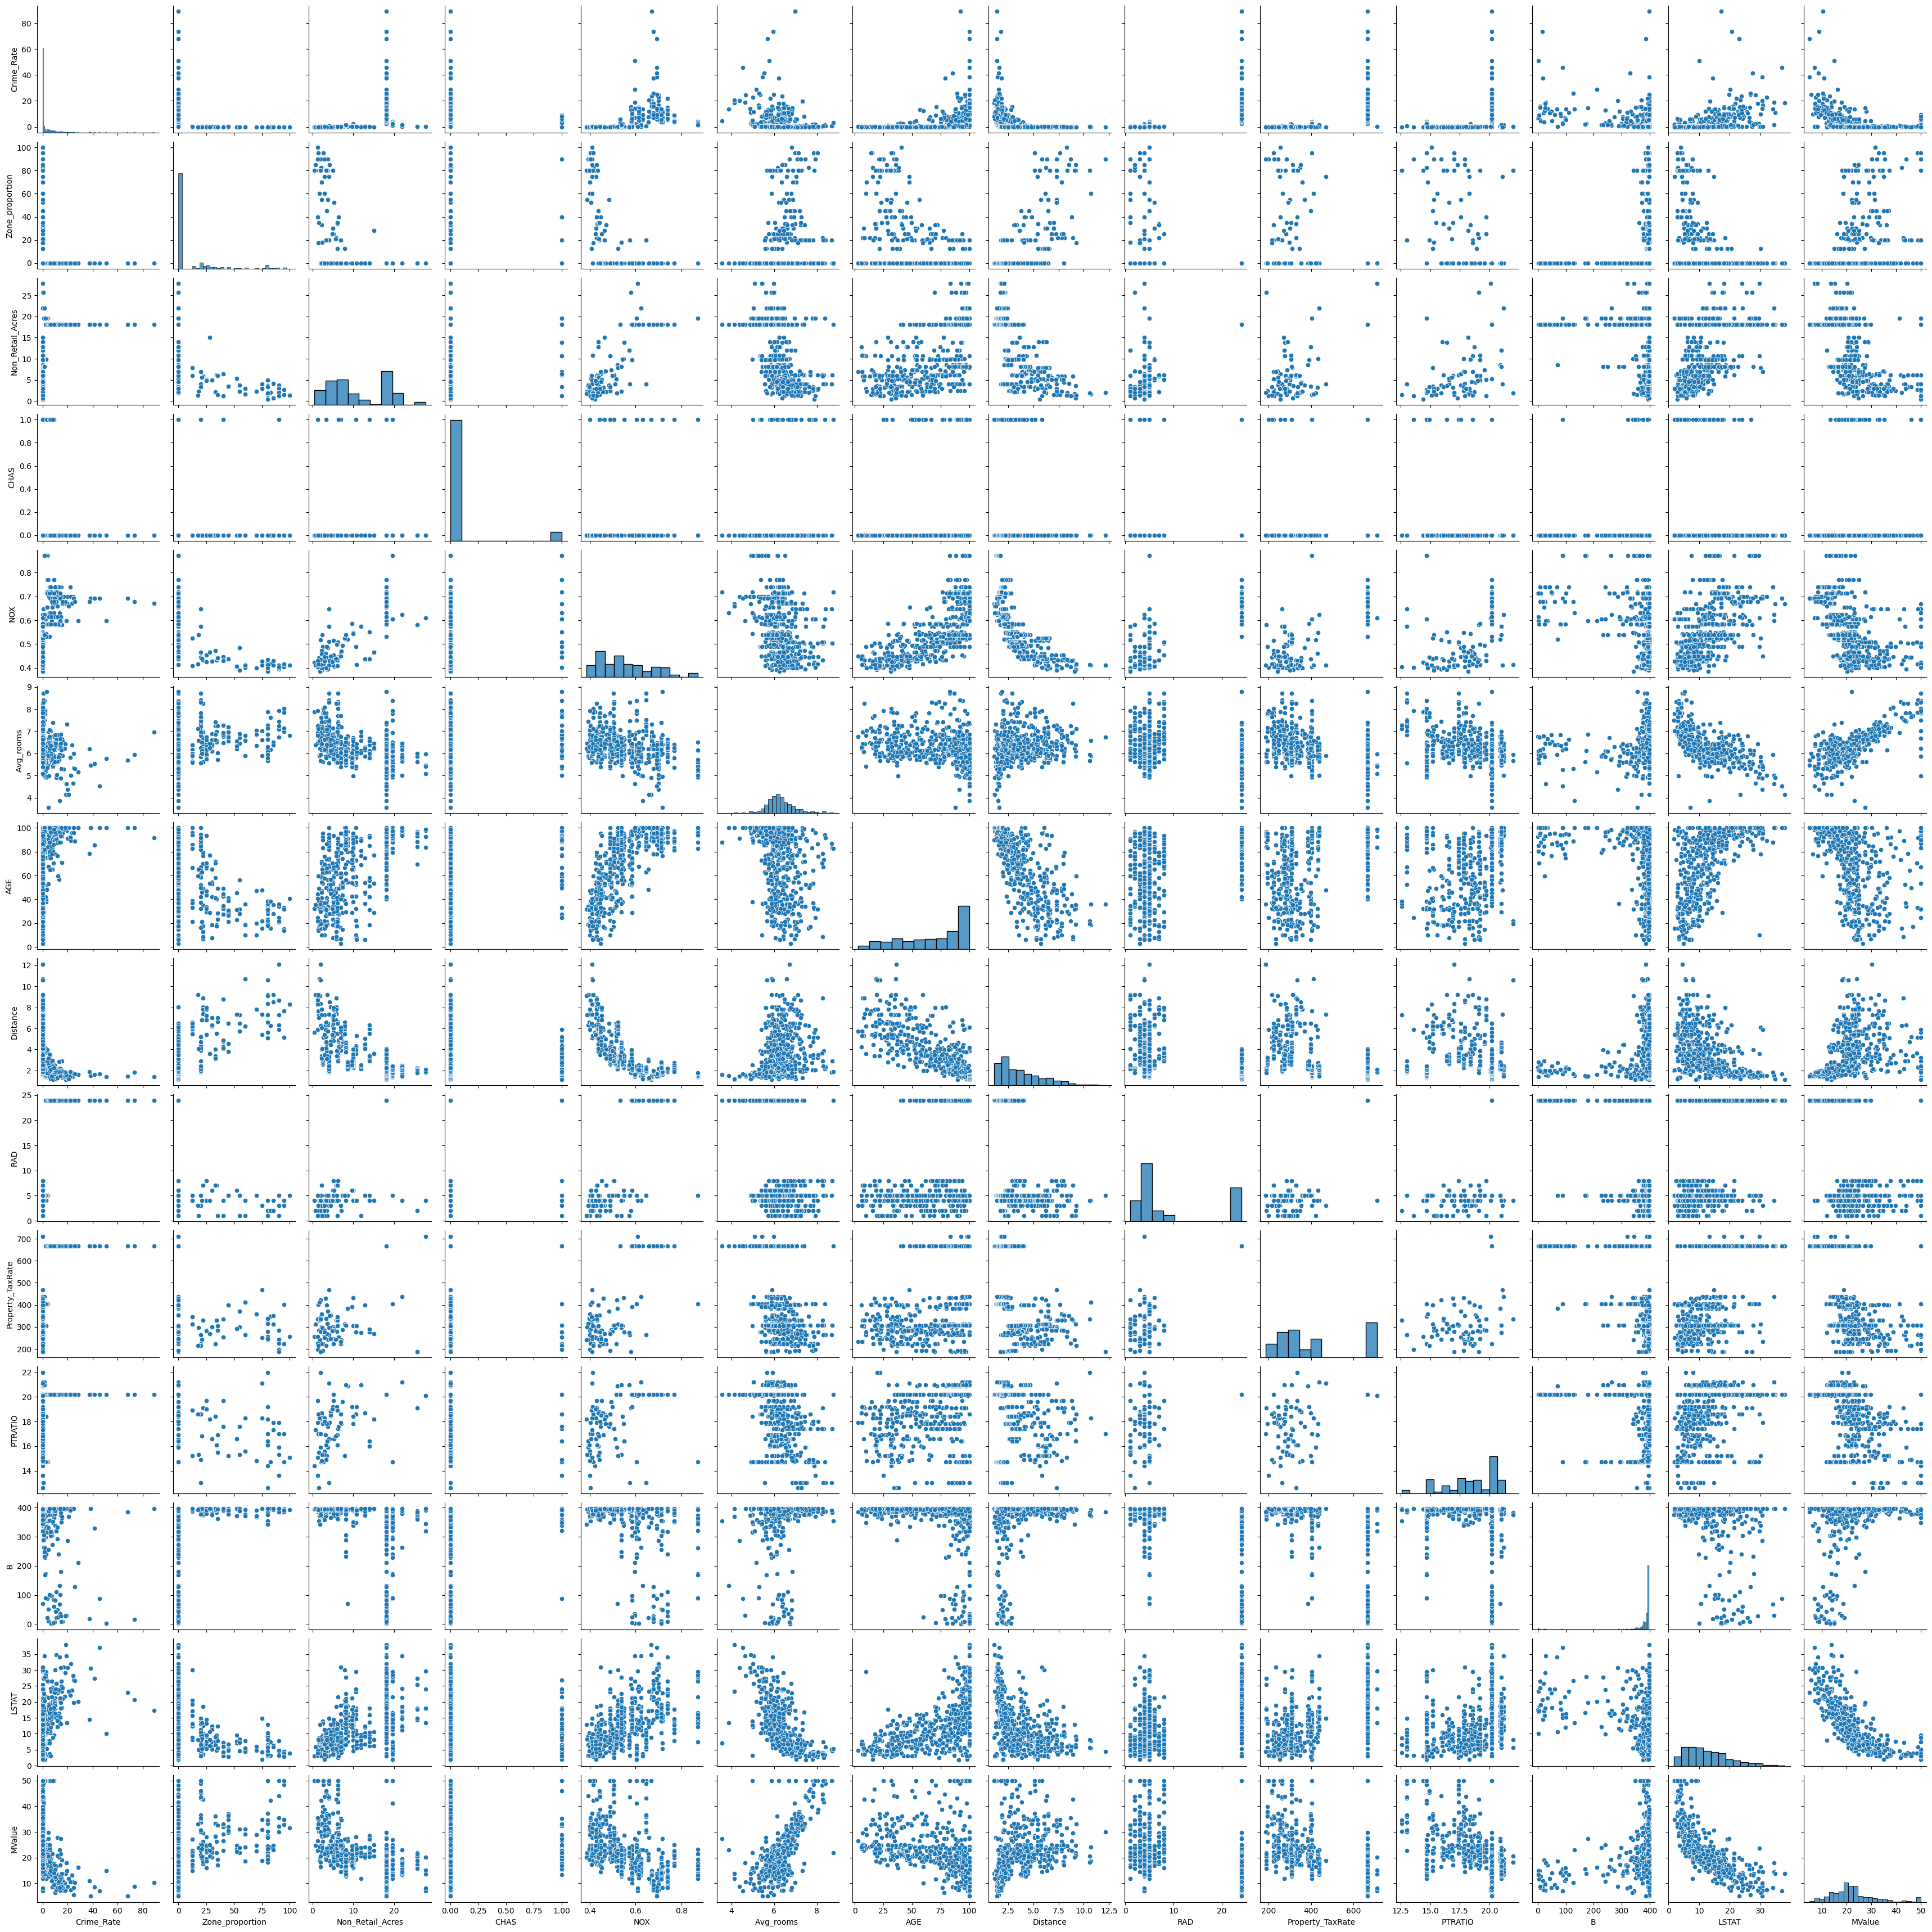

In [7]:
sns.pairplot(data)

<Axes: >

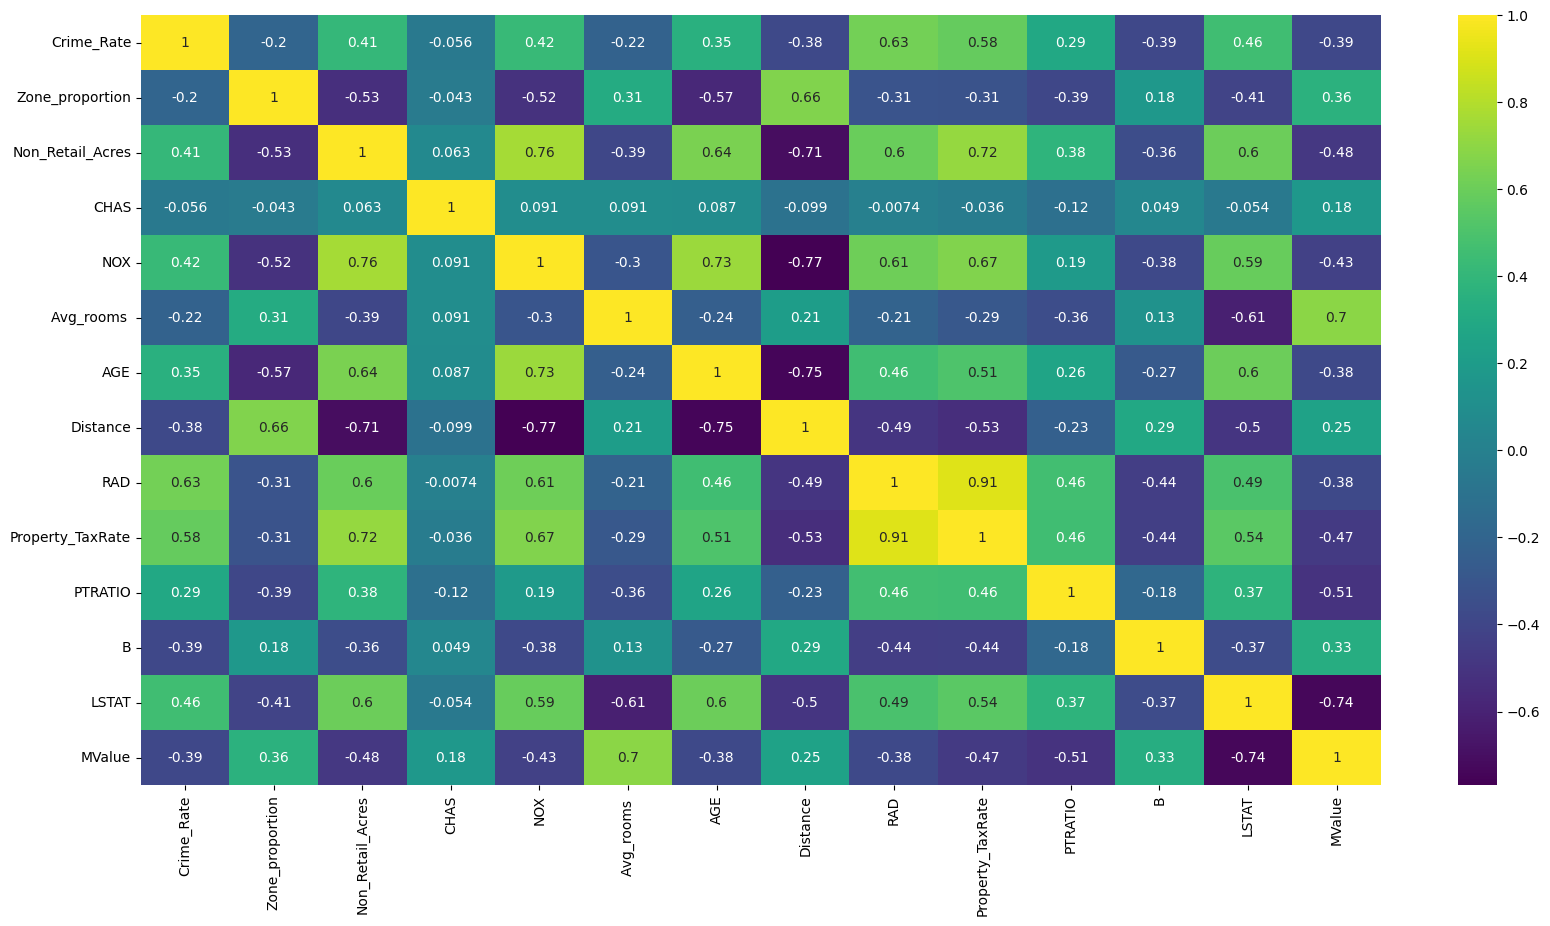

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap = 'viridis', annot =True)

scatter plot to visualize relationship betwen avg_rooms and mvalue

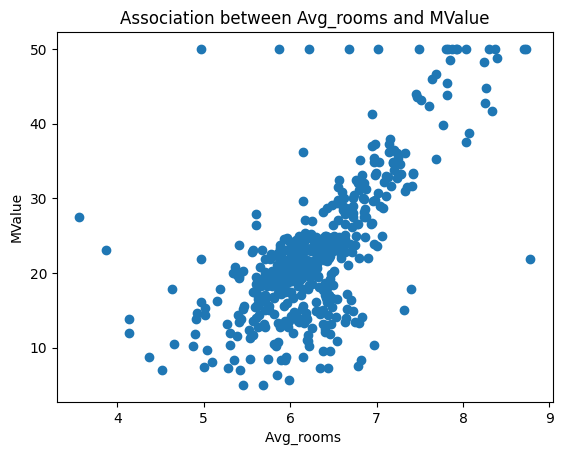

In [9]:
A=data['Avg_rooms ']
B=data['MValue']

plt.scatter(A,B)
plt.xlabel('Avg_rooms ')
plt.ylabel('MValue')
plt.title('Association between Avg_rooms and MValue')
plt.show()

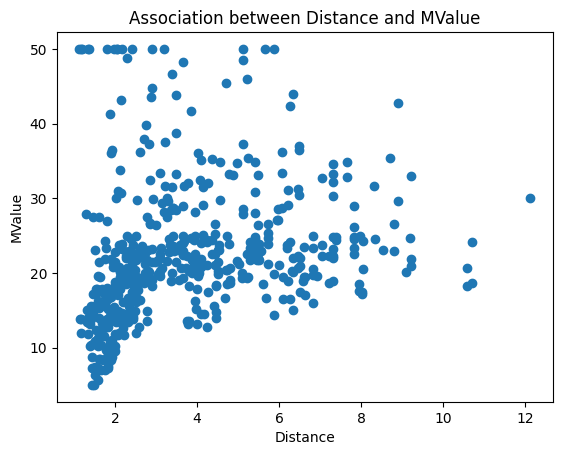

In [10]:
A=data['Distance']
B=data['MValue']

plt.scatter(A,B)
plt.xlabel('Distance')
plt.ylabel('MValue')
plt.title('Association between Distance and MValue')
plt.show()

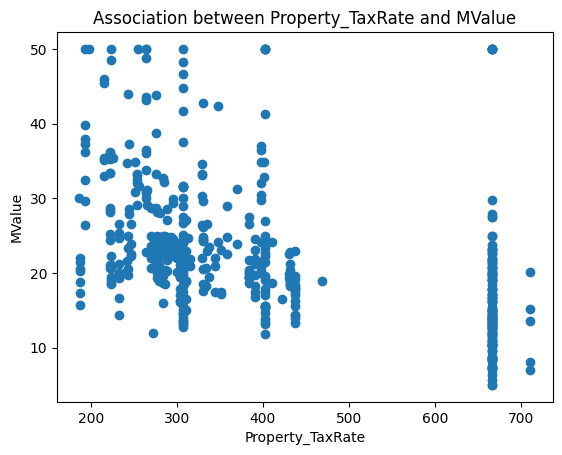

In [11]:
A=data['Property_TaxRate']
B=data['MValue']

plt.scatter(A,B)
plt.xlabel('Property_TaxRate')
plt.ylabel('MValue')
plt.title('Association between Property_TaxRate and MValue')
plt.show()

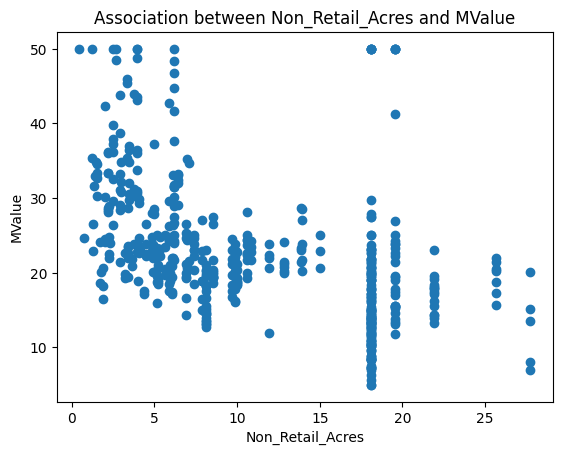

In [12]:
A=data['Non_Retail_Acres']
B=data['MValue']

plt.scatter(A,B)
plt.xlabel('Non_Retail_Acres')
plt.ylabel('MValue')
plt.title('Association between Non_Retail_Acres and MValue')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

x=data[['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres']]
y=data['MValue']

model.fit(x,y)

print("Intercept:",model.intercept_,'\nCoefficients',model.coef_)

Intercept: -15.941283403400888 
Coefficients [ 7.65969996 -0.49269365 -0.01327669 -0.21321181]


In [14]:

model1=LinearRegression()
features=['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres']
target=['MValue']
model1.fit(data[features],data[target])
print(model1.score(data[features],data[target]))

0.5696327584384112


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.33, random_state = 42)

In [16]:
model1.fit(x,y)

LinearRegression()

In [17]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

In [19]:
vif=pd.Series([variance_inflation_factor(x.values,idx)
for idx in range(x.shape[1])], index=x.columns)
print(vif)

Avg_rooms           16.747965
Distance             6.880607
Property_TaxRate    13.861510
Non_Retail_Acres     9.598374
dtype: float64
